Use freesteam's Python bindings to quickly calculate some steam properties. The Python API has changed extensively with the release of freesteam 2.0, so you need to use that version for this to work.

In [1]:
from freesteam import *



In [2]:
# Calculation of properties for given (p,h)
p = 1e5
h = 2000e3

S = steam_ph(p,h)

print S.T
print S.rho
print S.s

372.755918611
0.841852331072
5548.11447797


In [3]:
# Calculation of properties for given (p,T)
S2 = steam_pT(p, 400)

print S2.region
print S2.h

2
2730397.84597


In [4]:
# Calculation of saturation properties at given temperature, quality
S3 = steam_Tx(400, 0.5)
print S3.h
print S3.region

1624329.03772
4


In [5]:
# Calculation of saturated liquid properties at given pressure
Tsat = Tsat_p(p)
print Tsat
S3 = steam_Tx(Tsat, 0)
print S3.h

372.755918611
417436.485816


This example demonstrates how the new mplot3d features in Matplotlib can be used to plot properties surfaces using data from freesteam. This example plots a (T,p,s) surface.

In [6]:
# Example of 3D (T,s,p) surface plotted using new Matplotlib 3D-plotting feature.
# Contributed by Rod Stephenson. Thanks!

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import freesteam

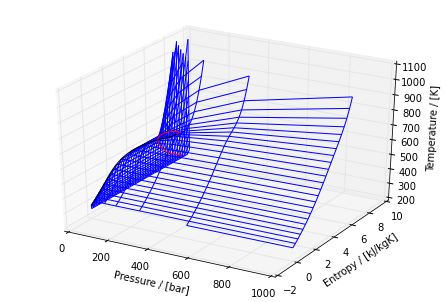

In [7]:
%matplotlib inline

fig = plt.figure()
ax = Axes3D(fig)
pp = np.logspace(-3,3,20)
ss = np.linspace(0.,10., 40)
xdata,ydata = np.meshgrid(pp, ss)
zdata = np.zeros(xdata.shape)

for i, p in enumerate(pp):
    for j, s in enumerate(ss):
        T = None
        if not freesteam.bounds_ps(p*1e5,s*1e3,0):
            try:
                T = freesteam.steam_ps(p*1e5,s*1e3).T
            except:
                pass
        zdata[j, i]= T
ax.plot_wireframe(xdata, ydata, zdata, rstride=1, cstride=1)
ax.set_xlabel('Pressure / [bar]')
ax.set_ylabel('Entropy / [kJ/kgK]')
ax.set_zlabel('Temperature / [K]')

TT0 = np.linspace(273.15, freesteam.TCRIT, 100)
psat = [freesteam.psat_T(T)/1e5 for T in TT0]
sf = [freesteam.region4_Tx(T,0).s/1e3 for T in TT0]
sg = [freesteam.region4_Tx(T,1).s/1e3 for T in TT0]
ax.plot(psat, sf, TT0,'k-')
ax.plot(psat, sg, TT0,'r-')
plt.show()